 <h1><center><span style="color:red">Breast Cancer Classification</span> </center></h1>

 <h3><center>There are two main classifications of tumors. One is known as benign and the other as malignant. A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.</center></h3>
 
  <h3><center>- This notebook is used to classify a breast cancer patient by wheather it is malignant or benign</center></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

## 1.0 Analyzing the dataset to understand the data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data=data.drop('Unnamed: 32',axis=1)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.1 Null values

In [5]:
data.apply(lambda x: sum(x.isnull()))

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### 1.2 Unique Values

In [6]:
print(data.shape[0])
data.apply(lambda x : len(x.unique()))

569


id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

### 1.3 Comparing the valus in the dependant variable

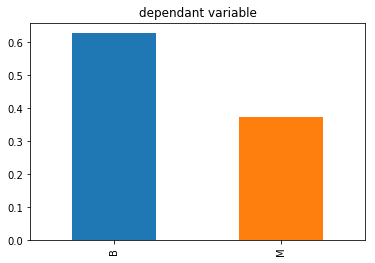

In [7]:
plt.figure(1)
data['diagnosis'].value_counts(normalize=True).plot.bar( title= 'dependant variable')

### 1.4 Analyzing the variables, after normalizing the variables and after log transforming the variable

In [8]:
def dist(variable):
    plt.subplot(222)
    ax1=plt.subplot(221)
    sns.distplot(data[variable]);
    ax2=plt.subplot(222)
    sns.distplot(np.log1p(data[variable]));
    ax2=plt.subplot(223)
    mms = MinMaxScaler()
    sns.distplot(mms.fit_transform(data[variable].values.reshape(-1,1)))

### 1.5 Analyzing the correlation of variables 

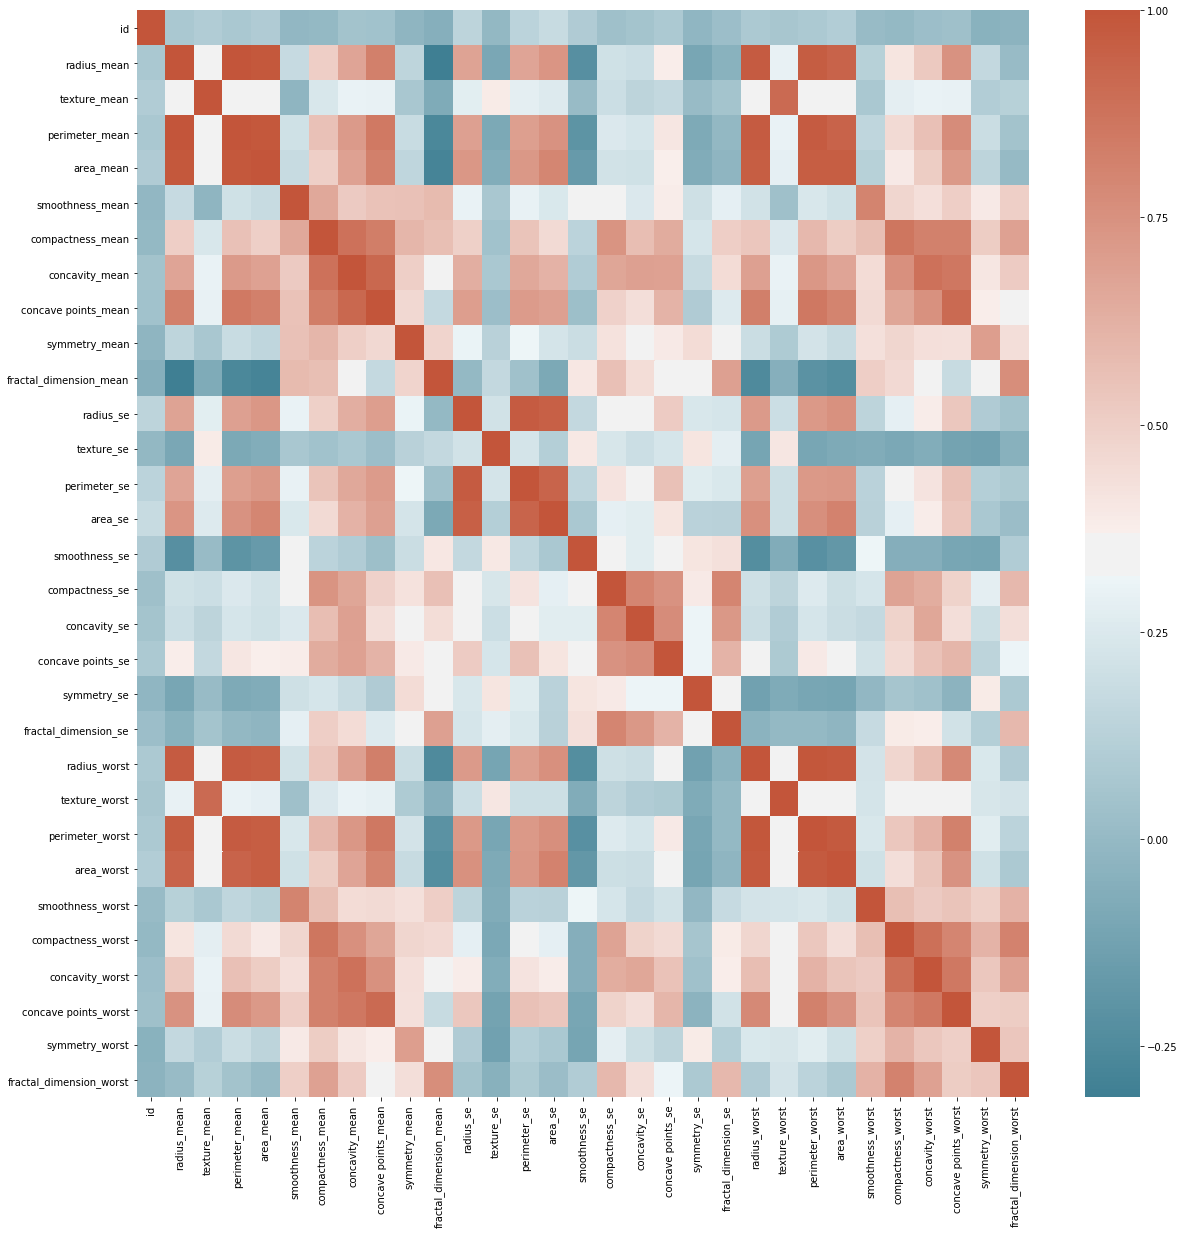

In [9]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data.corr(),cmap=sns.diverging_palette(220, 20, as_cmap=True))

### 1.6 Excluding one variable that is correlated

In [10]:
data = data.drop('radius_mean',axis=1)
data = data.drop('perimeter_mean',axis=1)
data = data.drop('area_mean',axis=1)
data = data.drop('perimeter_worst',axis=1)
data = data.drop('area_worst',axis=1)
data = data.drop('radius_se',axis=1)
data = data.drop('perimeter_se',axis=1)

### 1.7 Analyzing the distribution of each numerical variable 

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


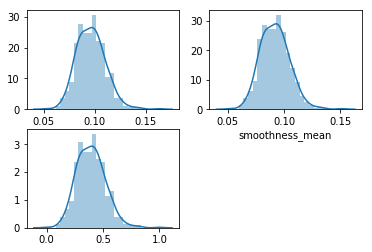

In [11]:
dist('smoothness_mean')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


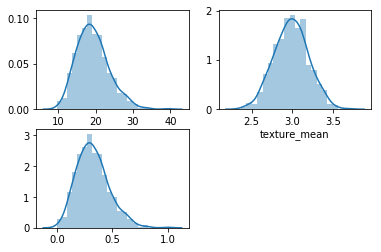

In [12]:
dist('texture_mean')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


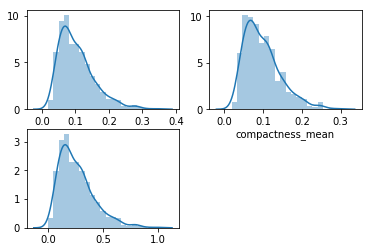

In [13]:
dist('compactness_mean')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


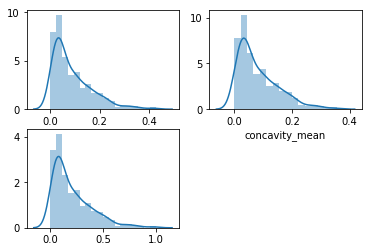

In [14]:
dist('concavity_mean')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


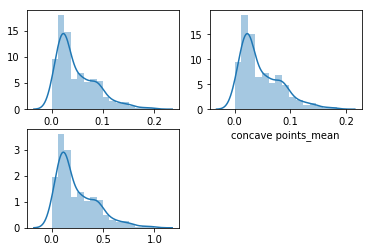

In [15]:
dist('concave points_mean')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


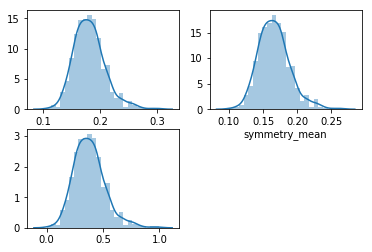

In [16]:
dist('symmetry_mean')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


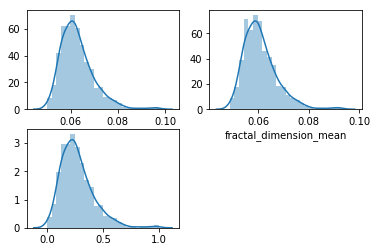

In [17]:
dist('fractal_dimension_mean')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


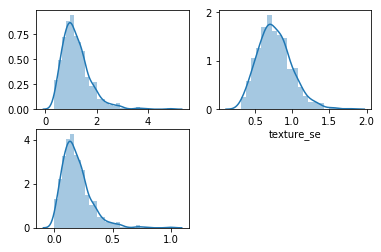

In [18]:
dist('texture_se')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


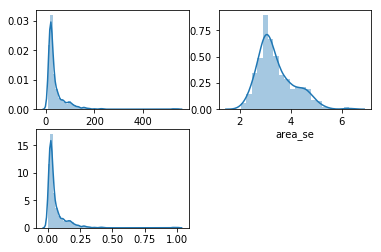

In [19]:
dist('area_se')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


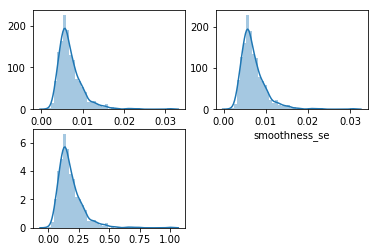

In [20]:
dist('smoothness_se')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


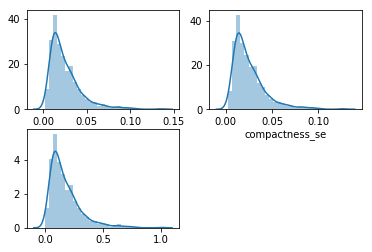

In [21]:
dist('compactness_se')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


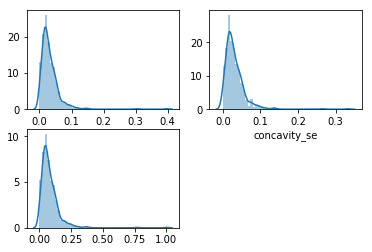

In [22]:
dist('concavity_se')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


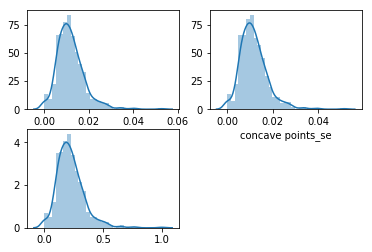

In [23]:
dist('concave points_se')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


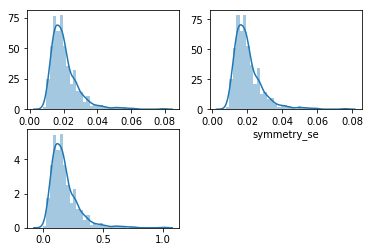

In [24]:
dist('symmetry_se')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


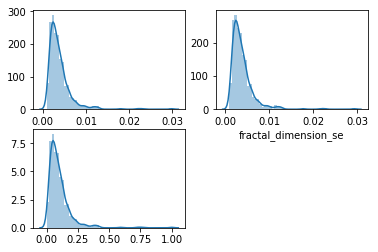

In [25]:
dist('fractal_dimension_se')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


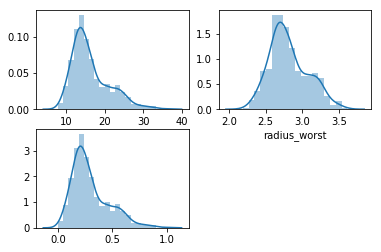

In [26]:
dist('radius_worst')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


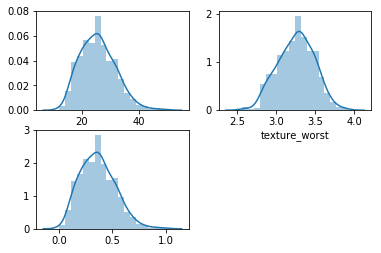

In [27]:
dist('texture_worst')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


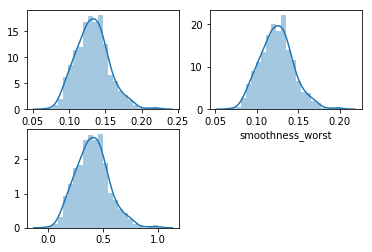

In [28]:
dist('smoothness_worst')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


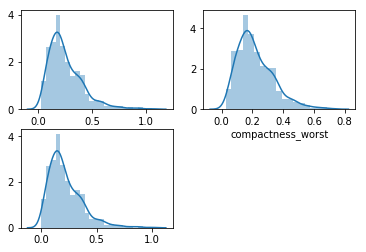

In [29]:
dist('compactness_worst')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


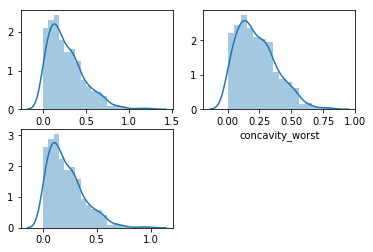

In [30]:
dist('concavity_worst')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


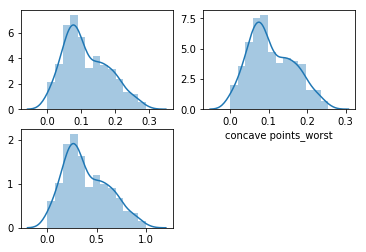

In [31]:
dist('concave points_worst')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


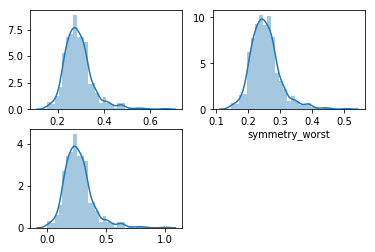

In [32]:
dist('symmetry_worst')

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\muralish\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


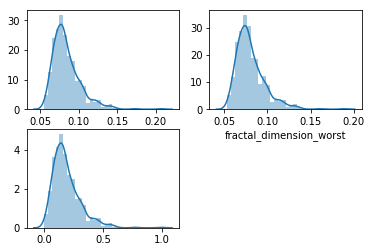

In [33]:
dist('fractal_dimension_worst')

### 1.8 Create a copy of the dataset to predict the model performance before and after remove outliers

In [34]:
data_outliers_removed = data.copy()

7.725000000000003 30.244999999999997


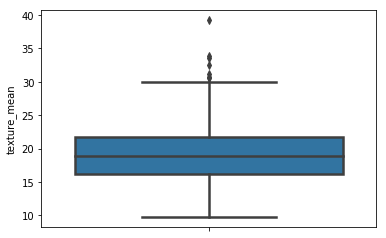

In [35]:
ax = sns.boxplot(y="texture_mean",  data=data_outliers_removed, linewidth=2.5)
description = data_outliers_removed.texture_mean.describe()
Q1 = description[4]
Q3 = description[6]
outliers_low = Q1 - (1.5 * (Q3-Q1))
outliers_high = Q3 + (1.5 * (Q3-Q1))
print(outliers_low,outliers_high)

In [36]:
numerical = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [37]:
for i in numerical:
    if i in data.columns:
        print (i + ' : ' + str(data_outliers_removed[i].mean()))

texture_mean : 19.289648506151142
smoothness_mean : 0.09636028119507908
compactness_mean : 0.10434098418277679
concavity_mean : 0.0887993158172232
concave points_mean : 0.04891914586994728
symmetry_mean : 0.18116186291739894
fractal_dimension_mean : 0.06279760984182776
texture_se : 1.2168534270650264
area_se : 40.337079086116
smoothness_se : 0.007040978910369067
compactness_se : 0.025478138840070295
concavity_se : 0.03189371634446397
concave points_se : 0.011796137082601054
symmetry_se : 0.02054229876977153
fractal_dimension_se : 0.0037949038664323374
radius_worst : 16.269189806678387
texture_worst : 25.677223198594024
smoothness_worst : 0.13236859402460457
compactness_worst : 0.25426504393673116
concavity_worst : 0.27218848330404216
concave points_worst : 0.11460622319859401
symmetry_worst : 0.2900755711775044
fractal_dimension_worst : 0.08394581722319859


In [38]:
for i in numerical:
    if i in data.columns:
        description = data_outliers_removed[i].describe()
        Q1 = description[4]
        Q3 = description[6]
        outliers_low = Q1 - (1.5 * (Q3-Q1))
        outliers_high = Q3 + (1.5 * (Q3-Q1))
        median = data_outliers_removed[i].median()
        temp_high = data_outliers_removed[i]>outliers_high
        temp_low = data_outliers_removed[i]>outliers_low
        data_outliers_removed.loc[temp_high == True,i]= median
        data_outliers_removed.loc[temp_low == True,i]= median

In [39]:
for i in numerical:
    if i in data.columns:
        print (i + ' : ' + str(data_outliers_removed[i].mean()))

texture_mean : 18.84
smoothness_mean : 0.09579400702987698
compactness_mean : 0.09262999999999999
concavity_mean : 0.06153999999999998
concave points_mean : 0.033499999999999995
symmetry_mean : 0.17907135325131812
fractal_dimension_mean : 0.06153999999999998
texture_se : 1.108
area_se : 24.53
smoothness_se : 0.0063799999999999985
compactness_se : 0.020450000000000003
concavity_se : 0.025889999999999993
concave points_se : 0.010929999999999999
symmetry_se : 0.01873
fractal_dimension_se : 0.0031869999999999993
radius_worst : 14.97
texture_worst : 25.41
smoothness_worst : 0.13119432337434098
compactness_worst : 0.2119
concavity_worst : 0.2267000000000001
concave points_worst : 0.09992999999999996
symmetry_worst : 0.2822
fractal_dimension_worst : 0.08004


### 1.9 Converting numerical variables to the log of each variable

In [40]:
for i in numerical:
    if i in data.columns:
        data_outliers_removed[i] = np.log1p(data_outliers_removed[i])
        data[i] = np.log1p(data[i])

### 1.10 Removing the ID variable

In [41]:
data = data.drop('id',axis=1)
data_outliers_removed = data_outliers_removed.drop('id',axis=1)

## 2.0 Model Training and Prediction

### 2.1 Using Logistic Regression to predict the model's preformance

In [42]:
def prediction(x,y,regressor):
    le = LabelEncoder()
    y=le.fit_transform(y)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)
    regressor.fit(x_train,y_train)
    y_pred = regressor.predict(x_test)
    return accuracy_score(y_test,y_pred)    

In [43]:
LR = LogisticRegression()

### 2.2  performance without outliers

In [44]:
prediction(data_outliers_removed.drop('diagnosis',axis=1),data['diagnosis'],LR)

0.6382978723404256

### 2.3 Performance with outliers

In [45]:
prediction(data.drop('diagnosis',axis=1),data['diagnosis'],LR)

0.8776595744680851

### 2.4 Using support vector machine by using different parameters

In [46]:
le = LabelEncoder()
x = data.drop('diagnosis',axis=1)
y = le.fit_transform(data['diagnosis'])
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    #print(accuracy_score(y_pred = y_pred, y_true = y_test),precision_score(y_pred = y_pred, y_true = y_test),recall_score(y_pred = y_pred, y_true = y_test))

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality

# Tuning hyper-parameters for precision



C:\Users\muralish\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\muralish\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\muralish\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\muralish\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\muralish\Miniconda3\lib\sit

Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'}

Grid scores on development set:

0.314 (+/-0.004) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.314 (+/-0.004) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.925 (+/-0.053) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.314 (+/-0.004) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.951 (+/-0.041) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.925 (+/-0.053) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.959 (+/-0.041) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.951 (+/-0.041) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.959 (+/-0.041) for {'C': 1, 'kernel': 'linear'}
0.966 (+/-0.040) for {'C': 10, 'kernel': 'linear'}
0.972 (+/-0.043) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.026) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision  

In [47]:
x = data.drop('diagnosis',axis=1)
y = le.fit_transform(data['diagnosis'])
clf = SVC(kernel='linear', C=1000)
scores = cross_val_score(clf, x, y, cv=10, scoring='accuracy')
scores.mean()

0.97715949356149

## 3.0 Comparing different techniques and optimizing the algorithm

### 3.1 Using cross validation and fitting SVM, Decision Tree Classifier

In [48]:
x = data.drop('diagnosis',axis=1)
y = le.fit_transform(data['diagnosis'])
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=4)
metrics = pd.DataFrame(index = ['accuracy','precision','recall'],
                       columns = ['Tree','SVM'])
def crossval(model,parameters):
    clf = GridSearchCV(model, parameters)
    clf.fit(X_train,y_train)
    y_pred = clf.best_estimator_.predict(X_test)
    accuracy = np.average(cross_val_score(clf, X_test, y_test, scoring='accuracy'))
    precision = np.average(cross_val_score(clf, X_test, y_test, scoring='precision'))
    recall = np.average(cross_val_score(clf, X_test, y_test, scoring='recall'))
    f1= np.average(cross_val_score(clf, X_test, y_test, scoring='f1'))
    if model==svm:
        metrics.loc['accuracy','SVM'] = accuracy
        metrics.loc['precision','SVM'] = precision
        metrics.loc['recall','SVM'] = recall
    if model==tree:
        metrics.loc['accuracy','Tree'] = accuracy
        metrics.loc['precision','Tree'] = precision
        metrics.loc['recall','Tree'] = recall
    return accuracy,precision,recall,f1,clf.best_estimator_,metrics

In [50]:
svm = SVC()
tree= DecisionTreeClassifier()
parameters = {'kernel':('linear', 'rbf'), 'C':(1,10,100),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
accuracy,precision,recall,f1,model,metrics = crossval(svm,parameters)
print(metrics)
parameters = {'max_depth':(1,6,12,15)}
accuracy,precision,recall,f1,model,metrics = crossval(tree,parameters)
print(metrics)

          Tree       SVM
accuracy   NaN  0.968083
precision  NaN  0.966583
recall     NaN  0.933333
               Tree       SVM
accuracy   0.947005  0.968083
precision  0.926901  0.966583
recall     0.933333  0.933333


### 3.2 Accuracy, Precision and Recall values of SVM and Decision Tree Classifier

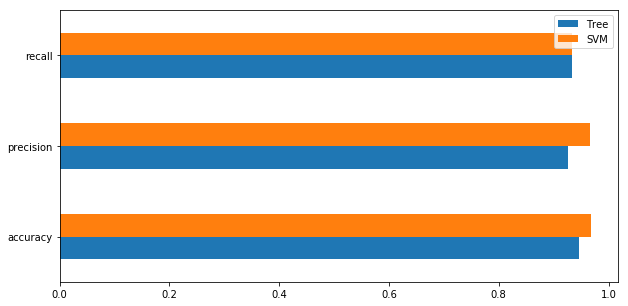

In [51]:
fig,ax = plt.subplots(figsize = (10,5))
metrics.plot(kind='barh', ax=ax)

### Since We are dealing with two different types of cancers and not True or False, I believe that our prediction has a good accuracy score and can be improved further

 <h1><center><span style="color:red">END</span> </center></h1>